In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
ad_clicks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codecademy/AB_Testing_for_ShoeFly/AB Testing for ShoeFly.com.csv')
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,07:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B


# **EDA(Exploratory Data Analysis)**

In [ ]:
# which ad platform is getting you the most views.
ad_gro = ad_clicks.groupby('utm_source').user_id.count().reset_index()
ad_gro

,utm_source,user_id
0,email,255
1,facebook,504
2,google,680
3,twitter,215


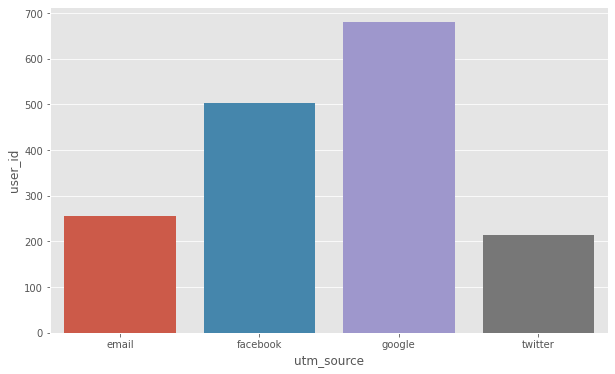

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.barplot(x='utm_source', y='user_id' ,data=ad_gro)

In [ ]:
# someone actually clicked on the ad that was displayed.
ad_clicks['is_click'] = ~ad_clicks.ad_click_timestamp.isnull()
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,07:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


In [ ]:
# he percent of people who clicked on ads from each utm_source.
clicks_by_source = ad_clicks.groupby(['utm_source','is_click']).user_id.count().reset_index()
clicks_pivot=clicks_by_source.pivot(index='utm_source',columns='is_click',values='user_id').reset_index()
print(clicks_by_source)
print("-"*10)
print(clicks_pivot)

  utm_source  is_click  user_id
0      email     False      175
1      email      True       80
2   facebook     False      324
3   facebook      True      180
4     google     False      441
5     google      True      239
6    twitter     False      149
7    twitter      True       66
----------
is_click utm_source  False  True
0             email    175    80
1          facebook    324   180
2            google    441   239
3           twitter    149    66


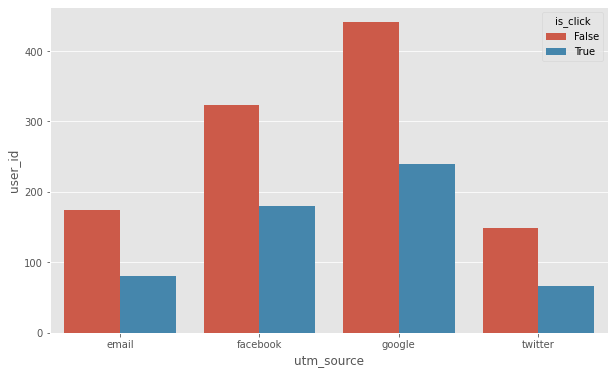

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x ='utm_source', y = 'user_id', data = clicks_by_source, hue = "is_click")

In [ ]:
clicks_pivot['percent_clicked'] = clicks_pivot[True]/(clicks_pivot[True] + clicks_pivot[False])
print(clicks_pivot)

is_click utm_source  False  True  percent_clicked
0             email    175    80         0.313725
1          facebook    324   180         0.357143
2            google    441   239         0.351471
3           twitter    149    66         0.306977


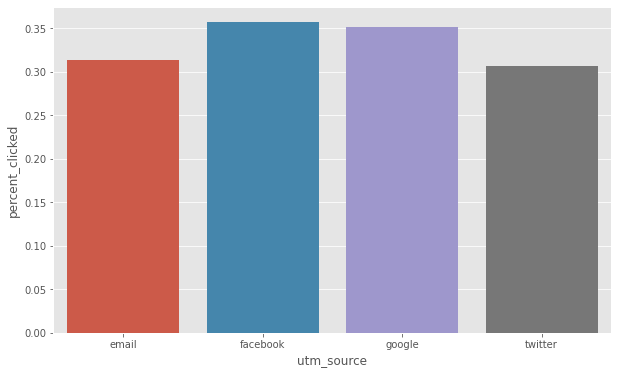

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='utm_source', y='percent_clicked', data=clicks_pivot)

# **A/B_Test**

In [ ]:
# Were approximately the same number of people shown both ads?
num_exper_gro = ad_clicks.groupby('experimental_group').count().reset_index()
print(num_exper_gro)

  experimental_group  user_id  utm_source  day  ad_click_timestamp  is_click
0                  A      827         827  827                 310       827
1                  B      827         827  827                 255       827


In [ ]:
percent_a_b = ad_clicks.groupby(['experimental_group', 'is_click']).count().reset_index()
percent_a_b_pivot=percent_a_b.pivot(index='experimental_group',columns='is_click',values='user_id').reset_index()
percent_a_b_pivot




is_click,experimental_group,False,True
0,A,517,310
1,B,572,255


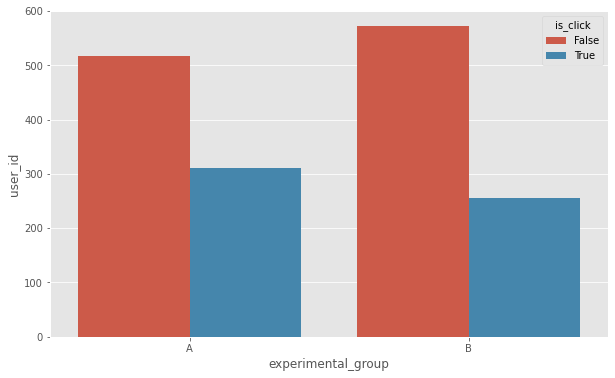

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x ='experimental_group', y = 'user_id', data = percent_a_b, hue = "is_click")

In [ ]:
percent_a_b_pivot['percent_experimental'] = percent_a_b_pivot[True]/(percent_a_b_pivot[True] + percent_a_b_pivot[False])
print(percent_a_b_pivot)

is_click experimental_group  False  True  percent_experimental
0                         A    517   310              0.374849
1                         B    572   255              0.308343


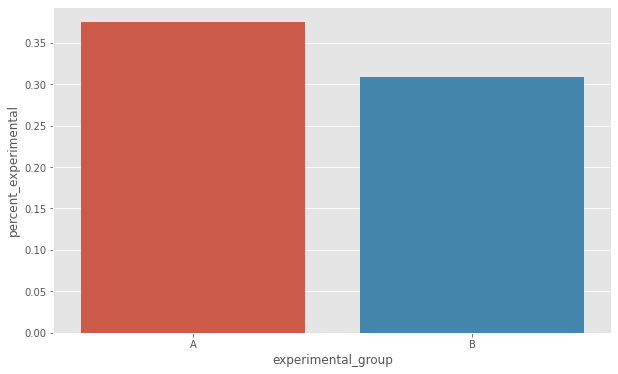

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='experimental_group', y='percent_experimental', data=percent_a_b_pivot)

# **A/B_Detail**

In [ ]:
a_clicks = ad_clicks[ad_clicks.experimental_group == 'A']
b_clicks = ad_clicks[ad_clicks.experimental_group == 'B']

In [ ]:
a_clicks_source = a_clicks.groupby(['experimental_group','utm_source','is_click']).user_id.count().reset_index()
a_clicks_pivot=a_clicks_source.pivot(index='utm_source',columns='is_click',values='user_id').reset_index()
print(a_clicks_source)
print("-"*10)
print(a_clicks_pivot)

  experimental_group utm_source  is_click  user_id
0                  A      email     False       80
1                  A      email      True       41
2                  A   facebook     False      160
3                  A   facebook      True       94
4                  A     google     False      212
5                  A     google      True      137
6                  A    twitter     False       65
7                  A    twitter      True       38
----------
is_click utm_source  False  True
0             email     80    41
1          facebook    160    94
2            google    212   137
3           twitter     65    38


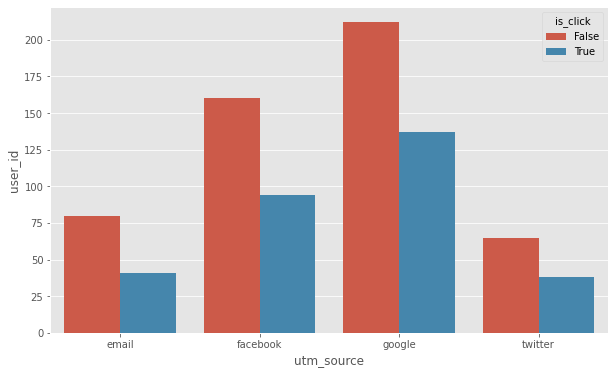

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x ='utm_source', y = 'user_id', data = a_clicks_source, hue = "is_click")

In [ ]:
a_clicks_pivot['percent_clicked'] = a_clicks_pivot[True]/(a_clicks_pivot[True] + a_clicks_pivot[False])
print(a_clicks_pivot)

is_click utm_source  False  True  percent_clicked
0             email     80    41         0.338843
1          facebook    160    94         0.370079
2            google    212   137         0.392550
3           twitter     65    38         0.368932


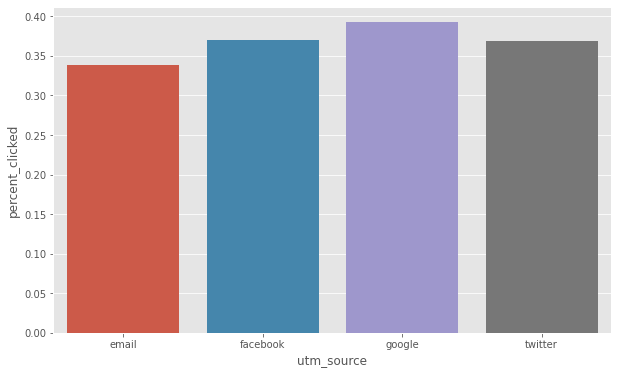

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='utm_source', y='percent_clicked', data= a_clicks_pivot)

In [ ]:
def a_b_clicks(ab_clicks):
  clicks_source = ab_clicks.groupby(['experimental_group','utm_source','is_click']).user_id.count().reset_index()
  clicks_pivot=clicks_source.pivot(index='utm_source',columns='is_click',values='user_id').reset_index()
  # print(clicks_pivot)

  plt.figure(figsize=(10,6))
  sns.barplot(x ='utm_source', y = 'user_id', data = clicks_source, hue = "is_click")
  clicks_pivot['percent_clicked'] = clicks_pivot[True]/(clicks_pivot[True] + clicks_pivot[False])
  print(clicks_pivot)
  plt.figure(figsize=(10,6))
  sns.barplot(x='utm_source', y='percent_clicked', data= clicks_pivot)

is_click utm_source  False  True  percent_clicked
0             email     80    41         0.338843
1          facebook    160    94         0.370079
2            google    212   137         0.392550
3           twitter     65    38         0.368932


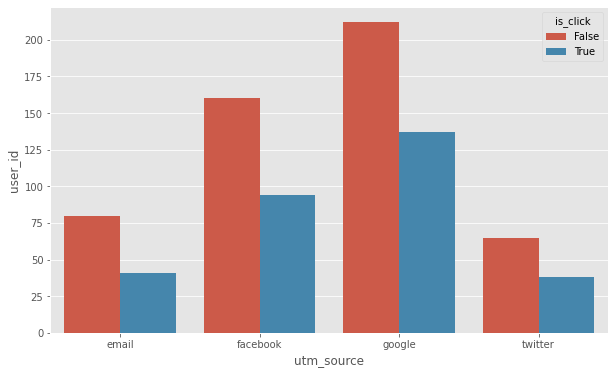

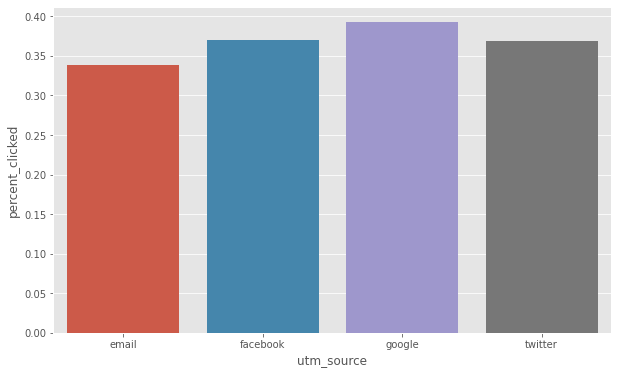

In [ ]:
a_b_clicks(a_clicks)

is_click utm_source  False  True  percent_clicked
0             email     95    39         0.291045
1          facebook    164    86         0.344000
2            google    229   102         0.308157
3           twitter     84    28         0.250000


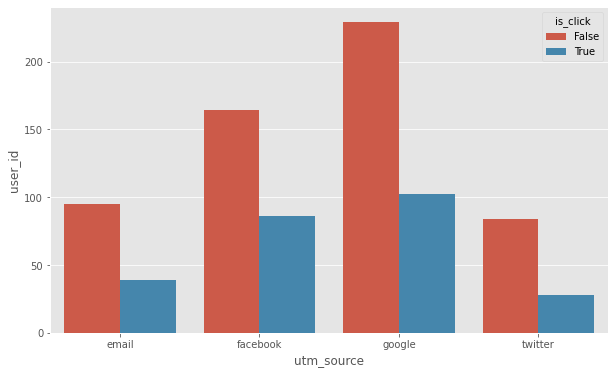

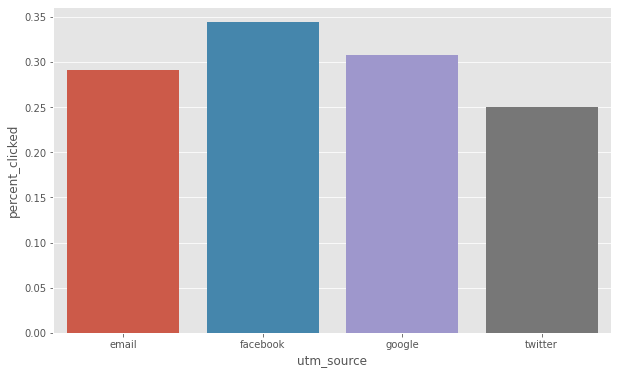

In [ ]:
a_b_clicks(b_clicks)